<a href="https://colab.research.google.com/github/Abd-elr4hman/Machine-Learning-alogarithms/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
class LogisticRegression:
  def __init__(self, lr=0.001, iterations= 1000):
    self.lr=lr 
    self.iterations= iterations
    self.weights= None
    self.bias= None   
  
  def fit(self, x, y):
    # init parameters
    n_examples, n_features= x.shape
    self.weights= np.zeros(n_features)
    self.bias= np.zeros(1)
    
    for _ in range(self.iterations):
      linear_poly= np.dot(x, self.weights) + self.bias
      y_pred= self.sigmoid(linear_poly)
      dw= (1/n_examples) * np.dot(x.T, (y_pred - y))
      db= (1/n_examples) * np.sum(y_pred - y)
      self.weights -= self.lr * dw
      self.bias -= self.lr * db
  
  def predict(self, x):
    linear_poly= np.dot(x, self.weights) + self.bias
    y_pred= self.sigmoid(linear_poly)
    y_pred_classes= [1 if prob > 0.5 else 0 for prob in y_pred]
    return y_pred_classes
    
  
  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))


In [4]:
breast_cancer= datasets.load_breast_cancer()
print(breast_cancer.data.shape)
print(breast_cancer.target.shape)


(569, 30)
(569,)


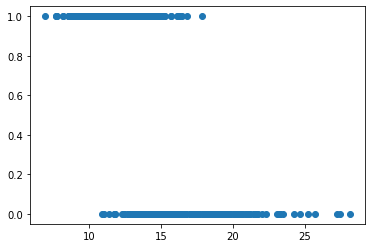

In [5]:
x, y= breast_cancer.data, breast_cancer.target
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state= 1234)
plt.scatter(x[:, 0],y)

In [6]:
regressor= LogisticRegression(lr= 0.0001)
regressor.fit(x_train, y_train)
predictions= regressor.predict(x_test)

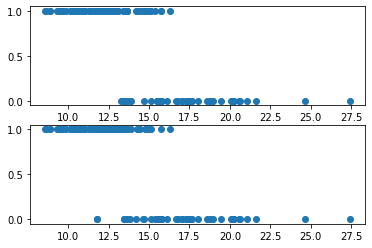

In [7]:
fig, ax= plt.subplots(2, 1)
ax[0].scatter(x_test[:, 0], predictions)
ax[1].scatter(x_test[:, 0], y_test)

In [8]:
def accuracy(y_true, y_pred):
  accuracy= np.sum(y_true==y_pred)/ len(y_true)
  return accuracy

In [9]:
print("accuracy= {}".format(accuracy(y_test, predictions)))

accuracy= 0.9298245614035088
